In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

API Configuration

In [2]:
# API endpoint and your API key
API_URL = "https://jobs.indianapi.in/jobs"
API_KEY = "sk-live-73UZ07Wi6KtXJDIRVSnvDeCyVl9Np6DYFnD8dNZQ"  # Replace with your actual API key

# Parameters for the API request
params = {
    "location": "Bangalore",
    "title": "Software Engineer",
    "experience": "Mid-Level",
    "limit": "100"  # Adjust limit as needed
}

# Headers for the API request
headers = {
    "X-Api-Key": API_KEY
}

Data Fetching Function

In [3]:
# Function to fetch data from the API
def fetch_job_data(url, headers, params):
    try:
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None

Fetch and Check Data

In [4]:
# Fetch job data
job_data = fetch_job_data(API_URL, headers, params)

# Check if data was fetched successfully
if job_data:
    print("Data fetched successfully!")
    print(f"Total records: {len(job_data)}")
    print(job_data[:10])  # Raw first 10 records (exact API output)
else:
    print("Failed to retrieve job data.")

Data fetched successfully!
Total records: 100
[{'id': 1, 'title': 'Exl  hiring fresher for executives | bangalore', 'company': 'Exl', 'about_company': 'Choosing a digital partner is about more than capabilities — it’s about collaboration and character. Unrealistic overhauls and off-the-shelf products ignore what matters most — your unique needs, culture, goals, and your legacy data and technology environments. At EXL, our collaboration is built on ongoing listening and learning to adapt our methodologies.', 'job_description': 'EXL Off Campus Hiring Fresher For Executives in Bangalore.', 'job_title': 'Executives', 'job_type': 'Full Time', 'location': 'Bangalore', 'experience': 'Fresher - 1 Year', 'role_and_responsibility': 'Not specified', 'education_and_skills': '', 'apply_link': 'https://exlcareers.peoplestrong.com/job/detail/EXL_E_1319756', 'posted_date': '2025-04-12T02:23:00'}, {'id': 2, 'title': 'Cognizant  hiring fresher for 2025 engineering graduates for genc next, genc pro &amp;

Data Processing

In [13]:
# Convert to DataFrame and parse dates
df = pd.DataFrame(job_data)
df['posted_date'] = pd.to_datetime(df['posted_date'], errors='coerce')

# Extract year/month and filter for 2025
df['year'] = df['posted_date'].dt.year
df['month'] = df['posted_date'].dt.month
df_2025 = df[df['year'] == 2025]

# Group by month (force all 12 months)
monthly_postings = (
    df_2025['month'].value_counts()
    .sort_index()
    .reindex(range(1,13), fill_value=0)  # Ensure 12 months
)

print("2025 Data Summary:")
print(f"- Total records: {len(df_2025)}")
print(f"- Months with data: {df_2025['month'].unique()}")
print("\nMonthly Counts:\n", monthly_postings)

2025 Data Summary:
- Total records: 100
- Months with data: [4 3]

Monthly Counts:
 month
1      0
2      0
3     17
4     83
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
Name: count, dtype: int64



Display Processed Data



In [14]:
# 1. Show processed DataFrame sample
print("Processed DataFrame Sample (First 5 Rows):")
display(df.head())  # Interactive table in Colab

# 2. Show filtered 2025 data stats
print(f"\n 2025 Records: {len(df_2025)} ({(len(df_2025)/len(df))*100:.1f}% of total)")

# 3. Monthly counts as a table
print("\n Monthly Postings (2025):")
print(monthly_postings.to_markdown(tablefmt="grid"))  # Pretty table

Processed DataFrame Sample (First 5 Rows):


,id,title,company,about_company,job_description,job_title,job_type,location,experience,role_and_responsibility,education_and_skills,apply_link,posted_date,year,month
0,1,Exl hiring fresher for executives | bangalore,Exl,Choosing a digital partner is about more than ...,EXL Off Campus Hiring Fresher For Executives i...,Executives,Full Time,Bangalore,Fresher - 1 Year,Not specified,,https://exlcareers.peoplestrong.com/job/detail...,2025-04-12 02:23:00,2025,4
1,2,Cognizant hiring fresher for 2025 engineering...,Cognizant,Cognizant (cts) is one of the world’s leading ...,Cognizant Off-Campus hiring for 2025 Engineeri...,"GenC Next, GenC Pro & GenC",Full Time,"Chennai, Bangalore, Hyderabad, Kolkata, Pune, ...",Not specified,"Understand business requirements, raise clarif...",2025 batch of specific B.E / B.Tech / M.E / M....,https://app.joinsuperset.com/join/#/signup/stu...,2025-04-12 02:21:00,2025,4
2,3,Salesforce hiring fresher for software engine...,Salesforce,Salesforce is the global leader in Customer Re...,Join Salesforce and define the future of cloud...,Software Engineering AMTS,Full Time,Hyderabad /Bangalore,Not specified,"Architect, design, implement, test and deliver...",B.E/ B.Tech graduating in 2025 in Computer Sci...,https://salesforce.wd12.myworkdayjobs.com/en-U...,2025-04-12 02:19:00,2025,4
3,4,Cognizant hiring fresher for trainee | kolkata,Cognizant,Cognizant (cts) is one of the world’s leading ...,We are looking for a dedicated Trainee with 0 ...,Trainee,Full Time,Kolkata,Fresher - 1 Years,Assist in data collection and analysis using M...,Possess a strong foundation in MS Excel includ...,https://careers.cognizant.com/global-en/jobs/0...,2025-04-12 02:17:00,2025,4
4,5,Fidelity hiring fresher for apprentice | bang...,Fidelity,"At Fidelity, our goal is to make financial exp...",Are you eager to be part of something positive...,Apprentice - Graduates,Full Time,Bangalore / Chennai,Fresher,Not specified,Ability to Perform effectively in a team envir...,https://jobs.fidelity.com/in/jobs/2086230/appr...,2025-04-12 02:15:00,2025,4



 2025 Records: 100 (100.0% of total)

 Monthly Postings (2025):
+---------+---------+
|   month |   count |
+=========+=========+
|       1 |       0 |
+---------+---------+
|       2 |       0 |
+---------+---------+
|       3 |      17 |
+---------+---------+
|       4 |      83 |
+---------+---------+
|       5 |       0 |
+---------+---------+
|       6 |       0 |
+---------+---------+
|       7 |       0 |
+---------+---------+
|       8 |       0 |
+---------+---------+
|       9 |       0 |
+---------+---------+
|      10 |       0 |
+---------+---------+
|      11 |       0 |
+---------+---------+
|      12 |       0 |
+---------+---------+


Data Visualization

<ipython-input-17-32797f7d1152>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('tab20', 12)  # Options: 'tab20', 'rainbow', 'hsv', 'viridis'


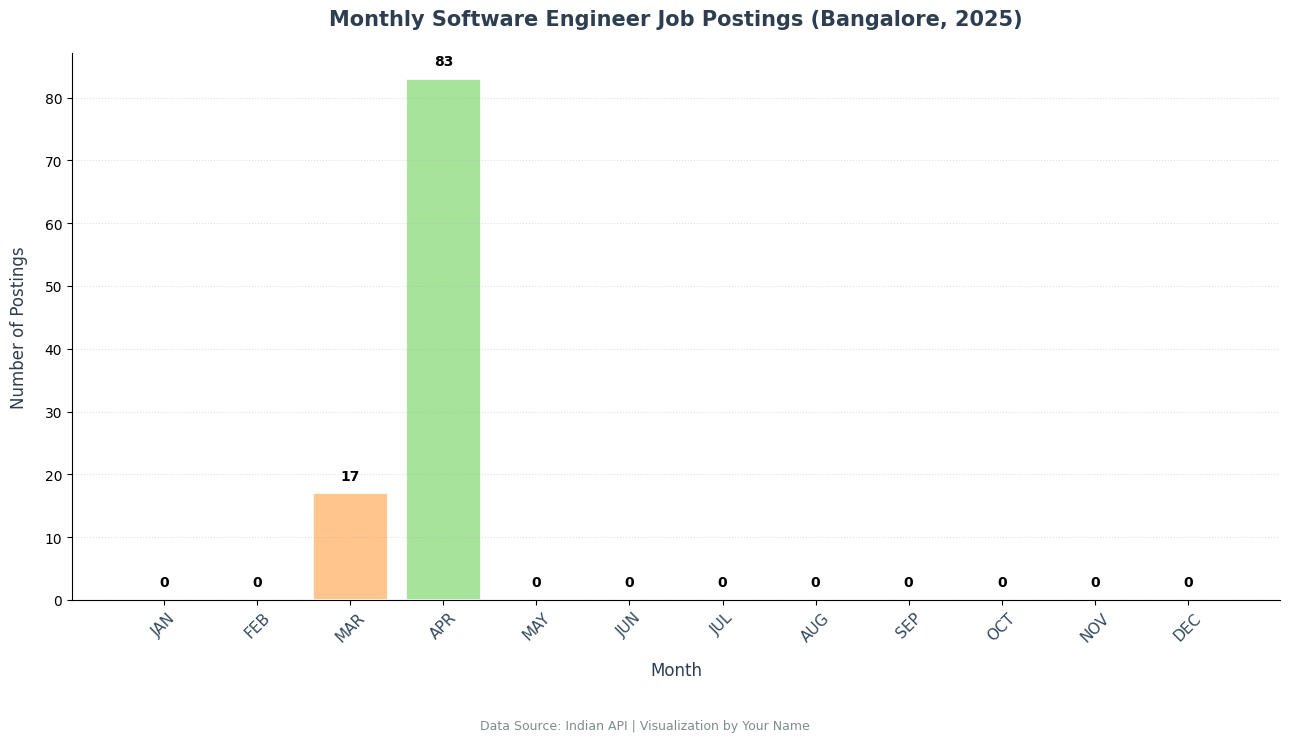

In [17]:
plt.figure(figsize=(13, 7))

# 1. Color Settings - 12 unique colors (one per month)
colormap = plt.cm.get_cmap('tab20', 12)  # Options: 'tab20', 'rainbow', 'hsv', 'viridis'
colors = [colormap(i) for i in range(12)]  # Generate 12 distinct colors

# 2. Plot Bars with Custom Colors
bars = plt.bar(
    monthly_postings.index,
    monthly_postings.values,
    color=colors,
    edgecolor='white',
    linewidth=1.5,
    alpha=0.85
)

# 3. Value Labels (with dynamic positioning)
max_height = monthly_postings.max()
for bar in bars:
    height = bar.get_height()
    vertical_offset = max_height * 0.02  # 2% of max height as padding
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height + vertical_offset,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

# 4. Title & Axis Styling
plt.title(
    "Monthly Software Engineer Job Postings (Bangalore, 2025)",
    fontsize=15,
    fontweight='bold',
    pad=20,
    color='#2c3e50'
)

plt.xlabel(
    "Month",
    fontsize=12,
    labelpad=12,
    color='#2c3e50'
)
plt.ylabel(
    "Number of Postings",
    fontsize=12,
    labelpad=12,
    color='#2c3e50'
)

# 5. X-Axis Month Labels
plt.xticks(
    range(1, 13),
    ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
     'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],
    rotation=45,
    fontsize=11,
    color='#34495e'
)

# 6. Grid & Frame Styling
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.4)
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# 7. Footer Note
plt.figtext(
    0.5, -0.05,
    "Data Source: Indian API | Visualization by Your Name",
    ha="center",
    fontsize=9,
    color='#7f8c8d'
)

plt.tight_layout()
plt.show()